{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Customize date formats on a plot created with **matplotlib** in **Python**.

</div>


## How to Reformat Date Labels in Matplotlib

So far in this chapter, using the `datetime` index has worked well for plotting, but there have been instances in which the date tick marks had to be rotated in order to fit them nicely along the x-axis.

Luckily, **matplotlib** provides functionality to change the format of a date on a plot axis using the `DateFormatter` module, so that you can customize the look of your labels without having to rotate them.

Using the `DateFormatter` module from **matplotlib**, you can specify the format that you want to use for the date using the syntax: `"%X %X"` where each `%X` element represents a part of the date as follows:
* `%Y` - 4 digit year with upper case `Y`
* `%y` - 2 digit year with lower case `y`
* `%m` - month as a number with lower case `m`
* `%b` - month as abbreviated name with lower case `b`
* `%d` - day with lower case `d`

You can also add a character between the `"%X %X"` to specify how the values are connected in the label such as `-` or `\`. 

For example, using the syntax `"%m-%d"` would create labels that appears as `month-day`, such as `05-01` for May 1st.  

On this page, you will learn how to use `DateFormatter` to modify the look and frequency of the axis labels on your plots. 


### Import Packages and Get Data

You will use the daily total precipitation (inches) data, sourced from the <a href="https://www.ncdc.noaa.gov/cdo-web/search" target ="_blank">National Centers for Environmental Information (formerly National Climate Data Center) Cooperative Observer Network (COOP)</a>, that you used previously in this chapter. 

To begin, import the necessary packages to work with **pandas** dataframe and download data. 

You will continue to work with modules from **pandas** and **matplotlib** including `DataFormatter` to plot dates more efficiently and with <a href="https://seaborn.pydata.org/introduction.html" target="_blank">**seaborn**</a> to make more attractive plots. 

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download the data
data = et.data.get_data('colorado-flood')

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with daily precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

Just as before, when you import the file to a **pandas** dataframe, be sure to specify the:
* no data values using the parameter `na_values`
* date column using the parameter `parse_dates`
* datetime index using the parameter `index_col`

In [4]:
# Import data using datetime and no data value
precip_2003_2013_daily = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col= ['DATE'],
                                     na_values=['999.99'])

Now, subset the data to time period June 1, 2005 - August 31, 2005 and plot the data without rotating the labels along the x-axis.

In [5]:
# Subset data to June-Aug 2005
precip_june_aug_2005 = precip_2003_2013_daily['2005-06-01':'2005-08-31']

precip_june_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


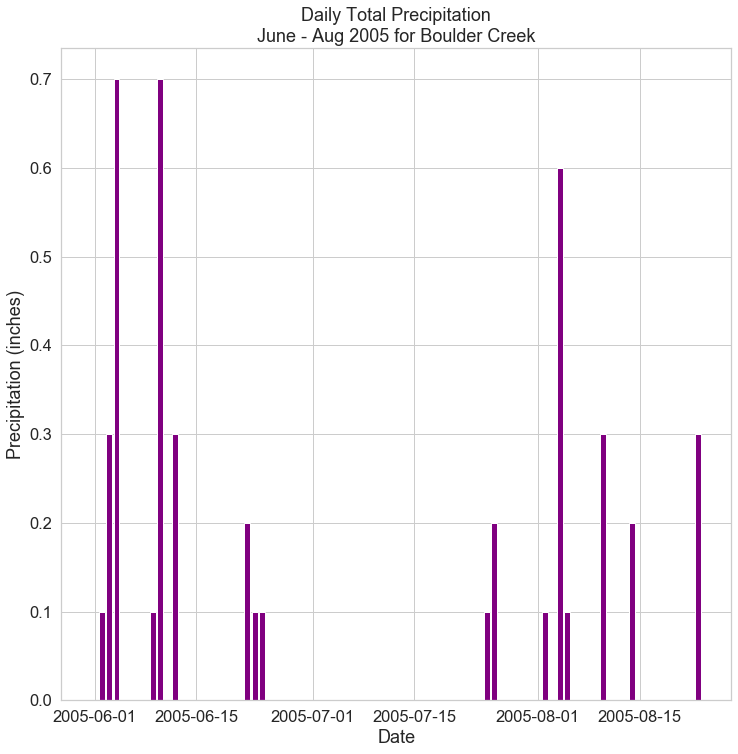

In [6]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

Notice that labels are not visually appealing with the year included. Given that the data have been subsetted to June to Aug within 2005, the labels can be shorten to remove the year, which is no longer needed. 


## Use DateFormatter to Reformat Date Labels in Matplotlib

To implement the custom date formatting, you can expand your plot code to include new code lines that define the format and then implement the format on the plot.

To begin, define the date format that you want to use as follows:

`date_form = DateFormatter("%m-%d")`

with the `"%m-%d"` specifying that you want the labels to appear like `05-01` for May 1st. 

Then, all the format that you defined using the `set_major_formatter()` method on the x-axis of the plot:

`ax.xaxis.set_major_formatter(date_form)`

Add these lines to your plot code and notice how much nicer the labels appear along the x-axis. 

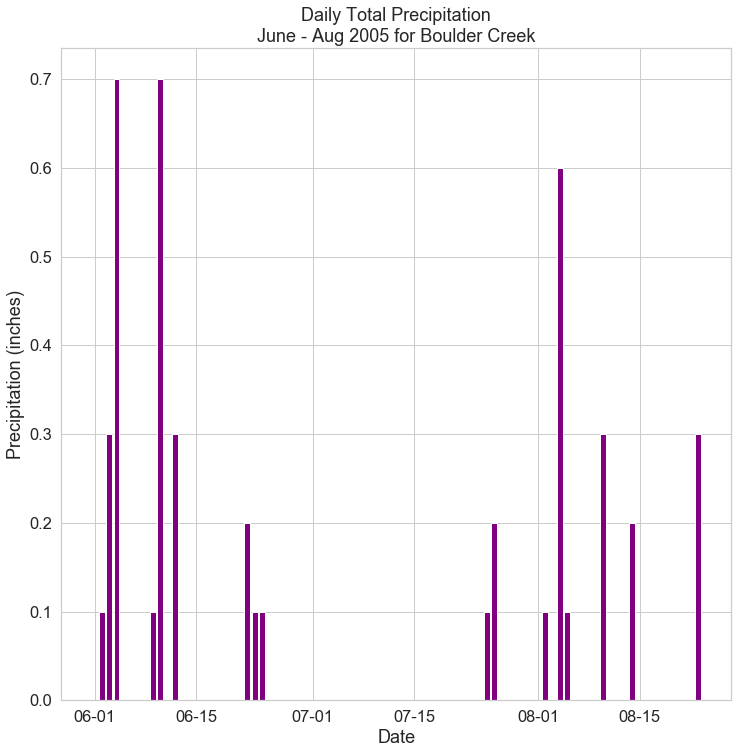

In [7]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

## Modify Frequency of Date Label Ticks

You can actually customize your plot further to identify time specific ticks along the x-axis. 

For example, you could use ticks to indicate each new week using the code:
`xaxis.set_major_locator()` 

to control the location of the ticks.

Using a parameter to this function, you can specify that you want a large tick for each week with:
`mdates.WeekdayLocator(interval=1)`

The `interval` is an integer that represents the weekly frequency of the ticks (e.g. a value of 2 to add a tick mark for every other week). 

Add these lines to your plot code and notice that you now have an at least one tick mark for each week. 

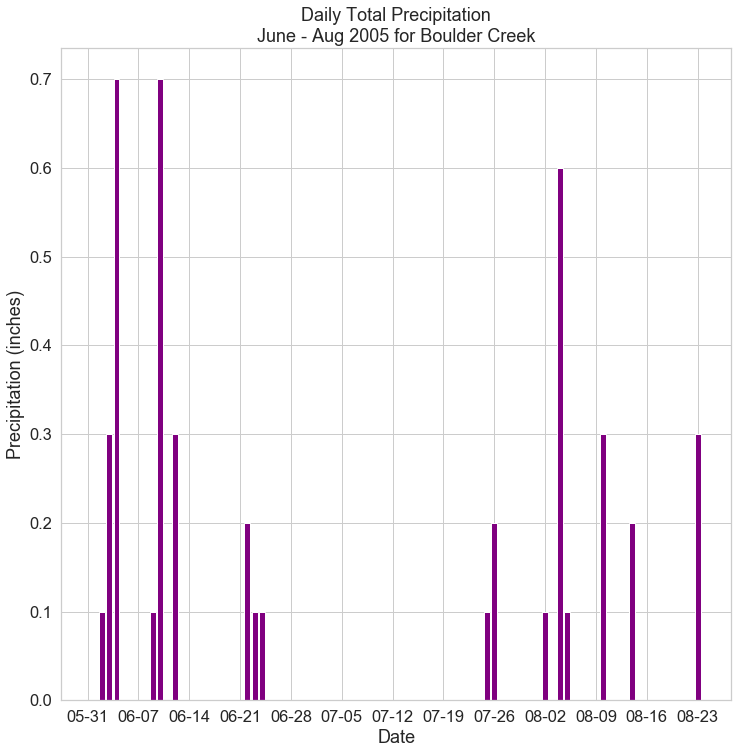

In [8]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

Note that you can also specify the start and end of the labels by adding a parameter to `ax.set` for `xlim` such as:
    
`xlim=["2005-06-01", "2005-08-31"]`

to have the tick marks start on June 1st and finish on Aug 31st. 

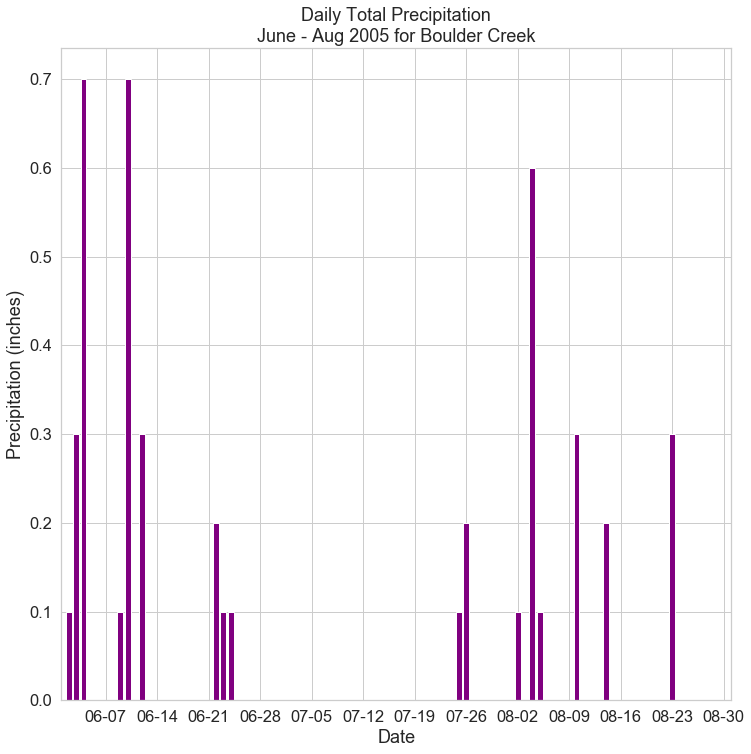

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
       xlim=["2005-06-01", "2005-08-31"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()

The code above added labeled major ticks to the plot. 

Note that you can also add minor ticks to your plot using: 

`ax.xaxis.set_minor_locator()`

Given we are using seaborn to customize the look of our plot, minor ticks are not rendered. However, if you wanted to add day ticks to a plot that did have minor ticks turned "on", you could use:

`ax.xaxis.set_minor_locator(mdates.DayLocator())`

with the parameter `mdates.DayLocator()` specifying that you want a tick for each day.

<div class="notice--info" markdown="1">

## Additional Resources

* <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html" target = "_blank">Time Series Data - Data Science Handbook</a>
* <a href = "https://matplotlib.org/examples/pylab_examples/subplots_demo.html" target = "_blank">Matplotlib Plot Demos</a>
* <a href = "http://joseph-long.com/writing/colorbars/" target = "_blank">Color bars in Matplotlib</a> 
* <a href = "https://realpython.com/blog/python/python-matplotlib-guide/" target = "_blank">In-depth guide to plotting</a> 


</div>

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Practice Your Time Series Skills 

Create plots for the following time subsets for the year of the September 2013 flood and the year before the flood:
* Time period A: 2012-08-01 to 2012-11-01
* Time period B: 2013-08-01 to 2013-11-01

Be sure to set the y limits to be the same for both plots, so they are visually comparable, using the parameter `ylim` for `ax.set()`:

`ylim=[min, max]`

and use the abbreviated month names in the date labels without an additional character between the values such as `Aug 1` for August 1st. 

You can also use `plt.tight_layout()` to ensure that the two plots are spaced evenly within the figure space. 

How different was the rainfall in 2012 compared to 2013?

</div>

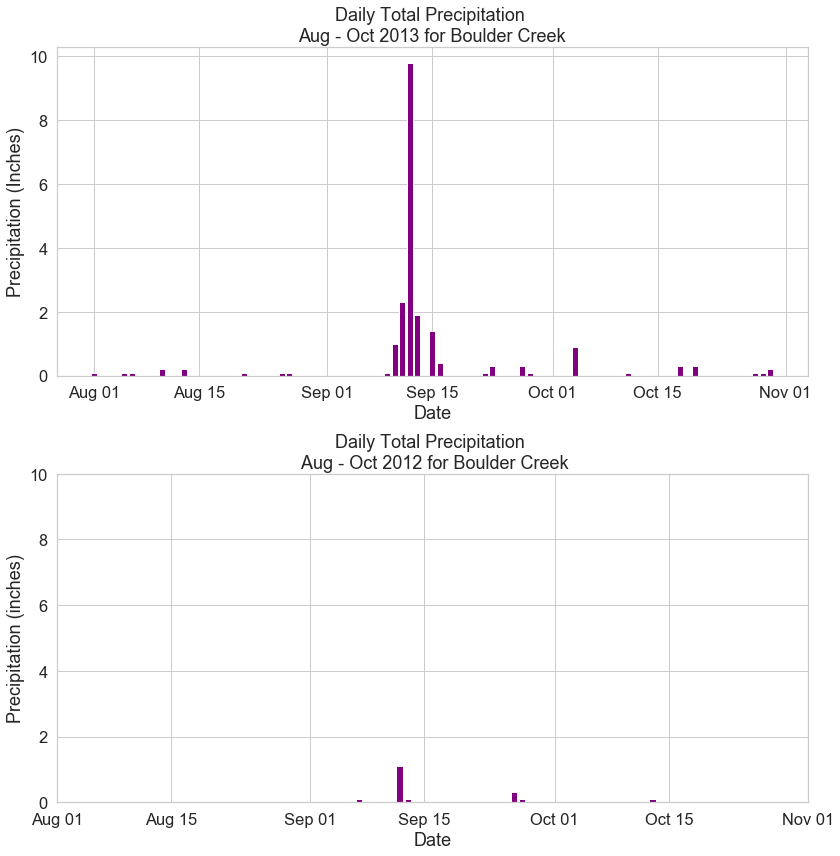

In [10]:
# from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
precip_boulder_AugOct = precip_2003_2013_daily.query(
    'DATE >= "2013-08-01" and DATE <= "2013-10-31"')
precip_boulder_AugOct_2 = precip_2003_2013_daily.query(
    'DATE > "2012-08-15" and DATE <= "2012-10-15"')

# Format the ticks -- this should be included in the previous lesson
# months = MonthLocator()  # every month
yearsFmt = DateFormatter('%b %d')

fig, (ax, ax1) = plt.subplots(2, 1, figsize=(12, 12))

ax.bar(precip_boulder_AugOct.index.values,
       precip_boulder_AugOct['DAILY_PRECIP'].values,
       color='purple')

# ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)
# ax.autoscale_view()
ax.set(title='Daily Total Precipitation \nAug - Oct 2013 for Boulder Creek',
       xlabel='Date', ylabel='Precipitation (Inches)')

# Plot the second plot
ax1.bar(precip_boulder_AugOct_2.index.values,
        precip_boulder_AugOct_2['DAILY_PRECIP'].values, color='purple')

ax1.set(xlabel="Date", ylabel="Precipitation (inches)",
        title="Daily Total Precipitation \n Aug - Oct 2012 for Boulder Creek",
        xlim=["2012-08-01", "2012-11-01"],
        ylim=[0, 10])

plt.tight_layout()

# Be sure to format the dates properly
# ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(yearsFmt)
# ax1.xaxis.set_minor_locator(months)
# ax1.autoscale_view()

plt.show()